# Goal : Compare Classification Models and their accuracy

The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.
Create model to predict whether customers subscribe to the product.
Use different classifying to predict the subscriptions, compare the time each model takes to train and their accuracy. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

In [2]:
Bankdata = pd.read_csv(r'C:\Users\prem_\OneDrive\Personal\AIML\Module17\bank+marketing\bank\bank.csv',sep = ';')

In [3]:
Bankdata

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [4]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# LogisticProgression

In [5]:
Bankdata.dropna()

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [9]:
#Bankdata = Bankdata.drop(columns = ['month'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Bankdata.drop(['y'], axis = 1), Bankdata['y'], random_state = 442,
                                                   stratify = Bankdata['y'])

In [11]:
#Create a selector object to select the columns with object datatype below
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
#To select features for the model 
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [12]:
lgr_pipe = ''
pipe_1_acc = ''

### BEGIN SOLUTION
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

#
#pipe_1_acc = lgr_pipe.score(X_test, y_test)

In [13]:


start = time.time()
lgr = lgr_pipe.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")



Training time: 0.3787403106689453s


In [14]:
pipe_1_acc = lgr_pipe.score(X_test, y_test)
pipe_1_acc

0.8983200707338639

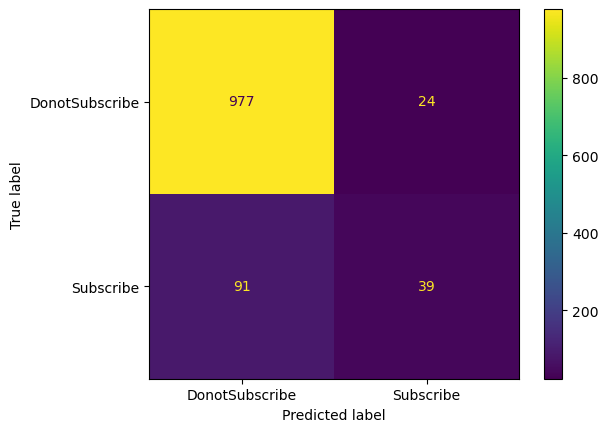

In [15]:
bankproduct_preds = lgr.predict(X_test)

confusion_mat = confusion_matrix(y_test, bankproduct_preds,labels=['no', 'yes'] )
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['DonotSubscribe', 'Subscribe' ])
disp.plot()
plt.show()

In [16]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)


In [14]:
coef_df.head(8)

feature     coefs
18  poutcome_success  2.300227
16   contact_unknown  1.117901
23          duration  1.042609
15          loan_yes  0.746094
13       default_yes  0.585256
3        job_retired  0.552756
14       housing_yes  0.522023
0    job_blue-collar  0.435823

## KNN Classifiers

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [18]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), selector),
                                     remainder = StandardScaler())
knn_pipe = Pipeline([('transformer', transformer), ('knn', KNeighborsRegressor())])
knn_pipe.fit(X_train, y_train)


#test_mse = mean_squared_error(y_test, preds_)
#test_mse = mean_squared_error(y_test, preds)




Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B97ECFEE50>)])),
                ('knn', KNeighborsRegressor())])

In [ ]:
#params = {'knn__n_neighbors': range(1, len(y_test), 2)}
#knn_grid = GridSearchCV(knn_pipe, param_grid=params)
#knn_grid.fit(X_train, y_train)
#best_k = knn_grid.best_params_['knn__n_neighbors']

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prem_\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C

In [20]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [32]:
data = Bankdata
data

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day  duration  campaign  pdays  previous poutcome   y  
0     cellular   19        79         1     -1         0  unknown  no  
1     cellular   11       220         1    339         4  failure  no  
2     cellular   16       185         1    330         1  failure  no  
3      unknown    3       199         4     -1         0  unknown  no  
4      unknown    5       226         1     -1         0  unknown  no  
...        ...  ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30       329         5     -1         0  unknown  no  
4517   unknown    9       153         1     -1         0  unknown  no  
4518  cellular   19       151        11     -1         0  unknown  no  
4519  cellular    6       129         4    211         3    other  no  
4520  cellular    3       345         2    249         7    other  no  

[4521 rows x 16 columns]

In [33]:
# generate binary values using get_dummies


In [34]:
data['marital'] = np.where(data['marital']=='married', 0, data['marital'])
data['marital'] = np.where(data['marital']=='single', 1, data['marital'])
data['marital'] = np.where(data['marital']=='divorced', 2, data['marital'])
data['marital'].value_counts()

marital
0    2797
1    1196
2     528
Name: count, dtype: int64

In [36]:

data['education'] = np.where(data['education']=='primary', 0, data['education'])
data['education'] = np.where(data['education']=='secondary', 1, data['education'])
data['education'] = np.where(data['education']=='tertiary', 2, data['education'])
data['education'] = np.where(data['education']=='unknown', 3, data['education'])


education
1    2306
2    1350
0     678
3     187
Name: count, dtype: int64

In [40]:

data['default'] = np.where(data['default']=='no', 0, data['default'])
data['default'] = np.where(data['default']=='yes', 1, data['default'])


default
0    4445
1      76
Name: count, dtype: int64

In [42]:

data['housing'] = np.where(data['housing']=='no', 0, data['housing'])
data['housing'] = np.where(data['housing']=='yes', 1, data['housing'])
data['housing'].value_counts()

housing
1    2559
0    1962
Name: count, dtype: int64

In [43]:
data['loan'] = np.where(data['loan']=='no', 0, data['loan'])
data['loan'] = np.where(data['loan']=='yes', 1, data['loan'])
data['loan'].value_counts()

loan
0    3830
1     691
Name: count, dtype: int64

In [45]:
data['contact'] = np.where(data['contact']=='cellular', 0, data['contact'])
data['contact'] = np.where(data['contact']=='telephone', 1, data['contact'])
data['contact'] = np.where(data['contact']=='unknown', 2, data['contact'])
data['contact'].value_counts()


contact
0    2896
2    1324
1     301
Name: count, dtype: int64

In [47]:


data['poutcome'] = np.where(data['poutcome']=='failure', 0, data['poutcome'])
data['poutcome'] = np.where(data['poutcome']=='success', 1, data['poutcome'])
data['poutcome'] = np.where(data['poutcome']=='other', 2, data['poutcome'])
data['poutcome'] = np.where(data['poutcome']=='unknown', 3, data['poutcome'])
data['poutcome'].value_counts()

poutcome
3    3705
0     490
2     197
1     129
Name: count, dtype: int64

In [53]:
data['job'].value_counts()

job
0     969
1     946
2     768
3     478
4     417
5     230
6     183
7     168
8     128
9     112
10     84
11     38
Name: count, dtype: int64

In [52]:
data['job'] = np.where(data['job']=='management', 0, data['job'])
data['job'] = np.where(data['job']=='blue-collar', 1, data['job'])
data['job'] = np.where(data['job']=='technician', 2, data['job'])
data['job'] = np.where(data['job']=='admin.', 3, data['job'])
data['job'] = np.where(data['job']=='services', 4, data['job'])
data['job'] = np.where(data['job']=='retired', 5, data['job'])
data['job'] = np.where(data['job']=='self-employed', 6, data['job'])
data['job'] = np.where(data['job']=='entrepreneur', 7, data['job'])
data['job'] = np.where(data['job']=='unemployed', 8, data['job'])
data['job'] = np.where(data['job']=='housemaid', 9, data['job'])
data['job'] = np.where(data['job']=='student', 10, data['job'])
data['job'] = np.where(data['job']=='unknown', 11, data['job'])

In [54]:
data

age job marital education default  balance housing loan contact  day  \
0      30   8       0         0       0     1787       0    0       0   19   
1      33   4       0         1       0     4789       1    1       0   11   
2      35   0       1         2       0     1350       1    0       0   16   
3      30   0       0         2       0     1476       1    1       2    3   
4      59   1       0         1       0        0       1    0       2    5   
...   ...  ..     ...       ...     ...      ...     ...  ...     ...  ...   
4516   33   4       0         1       0     -333       1    0       0   30   
4517   57   6       0         2       1    -3313       1    1       2    9   
4518   57   2       0         1       0      295       0    0       0   19   
4519   28   1       0         1       0     1137       0    0       0    6   
4520   44   7       1         2       0     1136       1    1       0    3   

      duration  campaign  pdays  previous poutcome   y  
0           79         1     -1         0        3  no  
1          220         1    339         4        0  no  
2          185         1    330         1        0  no  
3          199         4     -1         0        3  no  
4          226         1     -1         0        3  no  
...        ...       ...    ...       ...      ...  ..  
4516       329         5     -1         0        3  no  
4517       153         1     -1         0        3  no  
4518       151        11     -1         0        3  no  
4519       129         4    211         3        2  no  
4520       345         2    249         7        2  no  

[4521 rows x 16 columns]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['y'], axis = 1), data['y'], random_state = 442,
                                                   stratify = data['y'])

In [57]:
bank_pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(10))])

start = time.time()
bank_pipeline.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.0907752513885498s


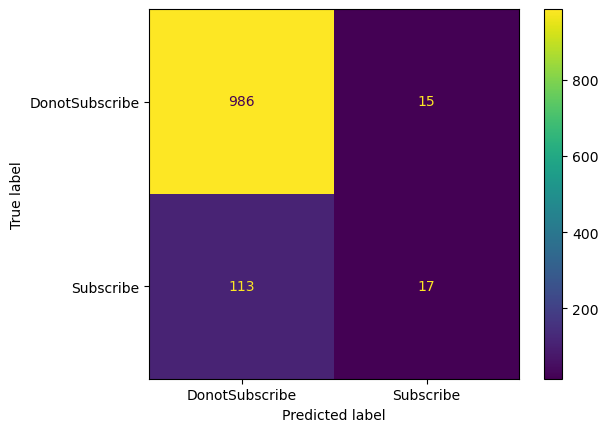

0.8868258178603006

In [58]:
bankproduct_preds = bank_pipeline.predict(X_test)
confusion_mat = confusion_matrix(y_test, bankproduct_preds,labels=['no', 'yes'] )
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['DonotSubscribe', 'Subscribe' ])
disp.plot()
plt.show()
min_fp = accuracy_score(y_test, bankproduct_preds)
min_fp

# Decession Tree Classifier

In [64]:
start = time.time()
model = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.09925389289855957s


In [59]:
train_accuracies = []
print(train_accuracies, 'starting with empty list \n')
test_accuracies = []
print(test_accuracies, 'starting with empty list \n')

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Max Depth: {i}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
print('\n')
print(train_accuracies, 'confirming list generation \n')
print(test_accuracies, 'confirming list generation \n')

[] starting with empty list 

[] starting with empty list 

Max Depth: 1, Train Accuracy: 0.8847, Test Accuracy: 0.8851
Max Depth: 2, Train Accuracy: 0.8947, Test Accuracy: 0.8815
Max Depth: 3, Train Accuracy: 0.8947, Test Accuracy: 0.8815
Max Depth: 4, Train Accuracy: 0.9050, Test Accuracy: 0.8833
Max Depth: 5, Train Accuracy: 0.9165, Test Accuracy: 0.8948
Max Depth: 6, Train Accuracy: 0.9260, Test Accuracy: 0.8939
Max Depth: 7, Train Accuracy: 0.9360, Test Accuracy: 0.8895
Max Depth: 8, Train Accuracy: 0.9507, Test Accuracy: 0.8780
Max Depth: 9, Train Accuracy: 0.9608, Test Accuracy: 0.8868
Max Depth: 10, Train Accuracy: 0.9684, Test Accuracy: 0.8895


[0.884660766961652, 0.8946902654867257, 0.8946902654867257, 0.9050147492625369, 0.9165191740412979, 0.9259587020648967, 0.9359882005899705, 0.9507374631268437, 0.9607669616519174, 0.9684365781710914] confirming list generation 

[0.8850574712643678, 0.8815207780725022, 0.8815207780725022, 0.883289124668435, 0.8947833775419982, 0.893899

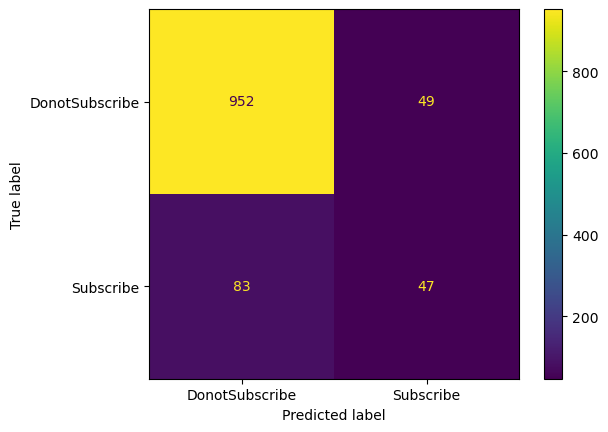

In [65]:
bankproduct_preds =  model.predict(X_test)
confusion_mat = confusion_matrix(y_test, bankproduct_preds,labels=['no', 'yes'] )
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['DonotSubscribe', 'Subscribe' ])
disp.plot()
plt.show()

In [67]:
start = time.time()
svc = SVC().fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.2809937000274658s


In [68]:
y_test_score = svc.score(X_test,y_test)
y_train_score = svc.score(X_train,y_train)

print(y_test_score)
print(y_train_score)

0.8850574712643678
0.884660766961652


In [70]:
res_dict = {'model': ['Logistic Regression', 'SVM', 'KNN','DecesionTree'],
           'train score': [0.89, 0.884,0.886, 0.889],
           'average fit time': [0.38, 0.09, 0.023,0.09],
           }
results_df = pd.DataFrame(res_dict).set_index('model')

results_df

train score  average fit time
model                                             
Logistic Regression        0.890             0.380
SVM                        0.884             0.090
KNN                        0.886             0.023
DecesionTree               0.889             0.090